# Led3 Results

In [1]:
import pandas

led3_results = ["<PATH>/led3_score/data/results/2_synthesis_score/models/led3_caspyrus1k_hist_xgboost.csv",
"<PATH>/led3_score/data/results/2_synthesis_score/models/led3_caspyrus10k_hist_xgboost.csv", 
"<PATH>/led3_score/data/results/2_synthesis_score/models/led3_caspyrus20k_hist_xgboost.csv",
"<PATH>/led3_score/data/results/2_synthesis_score/models/led3_caspyrus50k_hist_xgboost.csv",
"<PATH>/led3_score/data/results/2_synthesis_score/models/led3_chembl200k_random_hist_xgboost.csv"
]

# load all results into a single dataframe
led3_results = pandas.concat([pandas.read_csv(f) for f in led3_results], ignore_index=True)
led3_results

,hyperparameter_sweep_name,ID,learning_rate,max_depth,min_split_loss,n_estimators,hyperparameter_training_dataset_path,name,hyperparameter_search_accuracy,hyperparameter_search_f1,...,test_accuracy,test_precision,test_recall,test_f1,test_mcc,chembl_test_accuracy,chembl_test_precision,chembl_test_recall,chembl_test_f1,chembl_test_mcc
0,hearty-sweep-896,szp7e473,0.271941,1,4.949750,205,/led3_score/data/res...,led3_caspyrus1k_hist_xgboost,0.687778,0.718719,...,0.69000,0.677966,0.769231,0.720721,0.379294,0.707925,0.689870,0.853810,0.763135,0.408705
1,valiant-sweep-453,dyym3owa,0.268463,18,0.009334,244,/led3_score/data/res...,led3_caspyrus10k_hist_xgboost,0.781556,0.817760,...,0.78900,0.801303,0.846816,0.823431,0.563139,0.784910,0.775495,0.858102,0.814710,0.564036
2,silvery-sweep-190,ucmrdqut,0.195864,17,0.039415,244,/led3_score/data/res...,led3_caspyrus20k_hist_xgboost,0.806333,0.841617,...,0.81000,0.826580,0.860034,0.842975,0.603469,0.803390,0.799348,0.858792,0.828004,0.601347
3,worthy-sweep-273,5o6k3l0p,0.199536,17,0.015818,223,/led3_score/data/res...,led3_caspyrus50k_hist_xgboost,0.832444,0.863865,...,0.83820,0.851208,0.883946,0.867268,0.661058,0.824910,0.822324,0.870315,0.845639,0.645147
4,restful-sweep-707,zce9hhl3,0.228350,18,0.092618,241,/led3_score/data/res...,led3_chembl200k_random_hist_xgboost,0.873922,0.887603,...,0.88015,0.879306,0.906704,0.892795,0.757449,0.879280,0.876772,0.908641,0.892422,0.755627


In [2]:
# select the name train_f1, test_f1, chembl_test_f1

led3_results[["name", "train_f1", "test_f1", "chembl_test_f1"]]

,name,train_f1,test_f1,chembl_test_f1
0,led3_caspyrus1k_hist_xgboost,0.785498,0.720721,0.763135
1,led3_caspyrus10k_hist_xgboost,1.000000,0.823431,0.814710
2,led3_caspyrus20k_hist_xgboost,1.000000,0.842975,0.828004
3,led3_caspyrus50k_hist_xgboost,1.000000,0.867268,0.845639
4,led3_chembl200k_random_hist_xgboost,0.999410,0.892795,0.892422


In [5]:
led3_results[["name", "train_mcc", "test_mcc", "chembl_test_mcc"]]

,name,train_mcc,test_mcc,chembl_test_mcc
0,caspyrus1k,0.526165,0.379294,0.408705
1,caspyrus10k,1.000000,0.563139,0.564036
2,caspyrus20k,1.000000,0.603469,0.601347
3,caspyrus50k,1.000000,0.661058,0.645147
4,chembl200k_random,0.998687,0.757449,0.755627


Text(0.5, 0.98, 'led3')

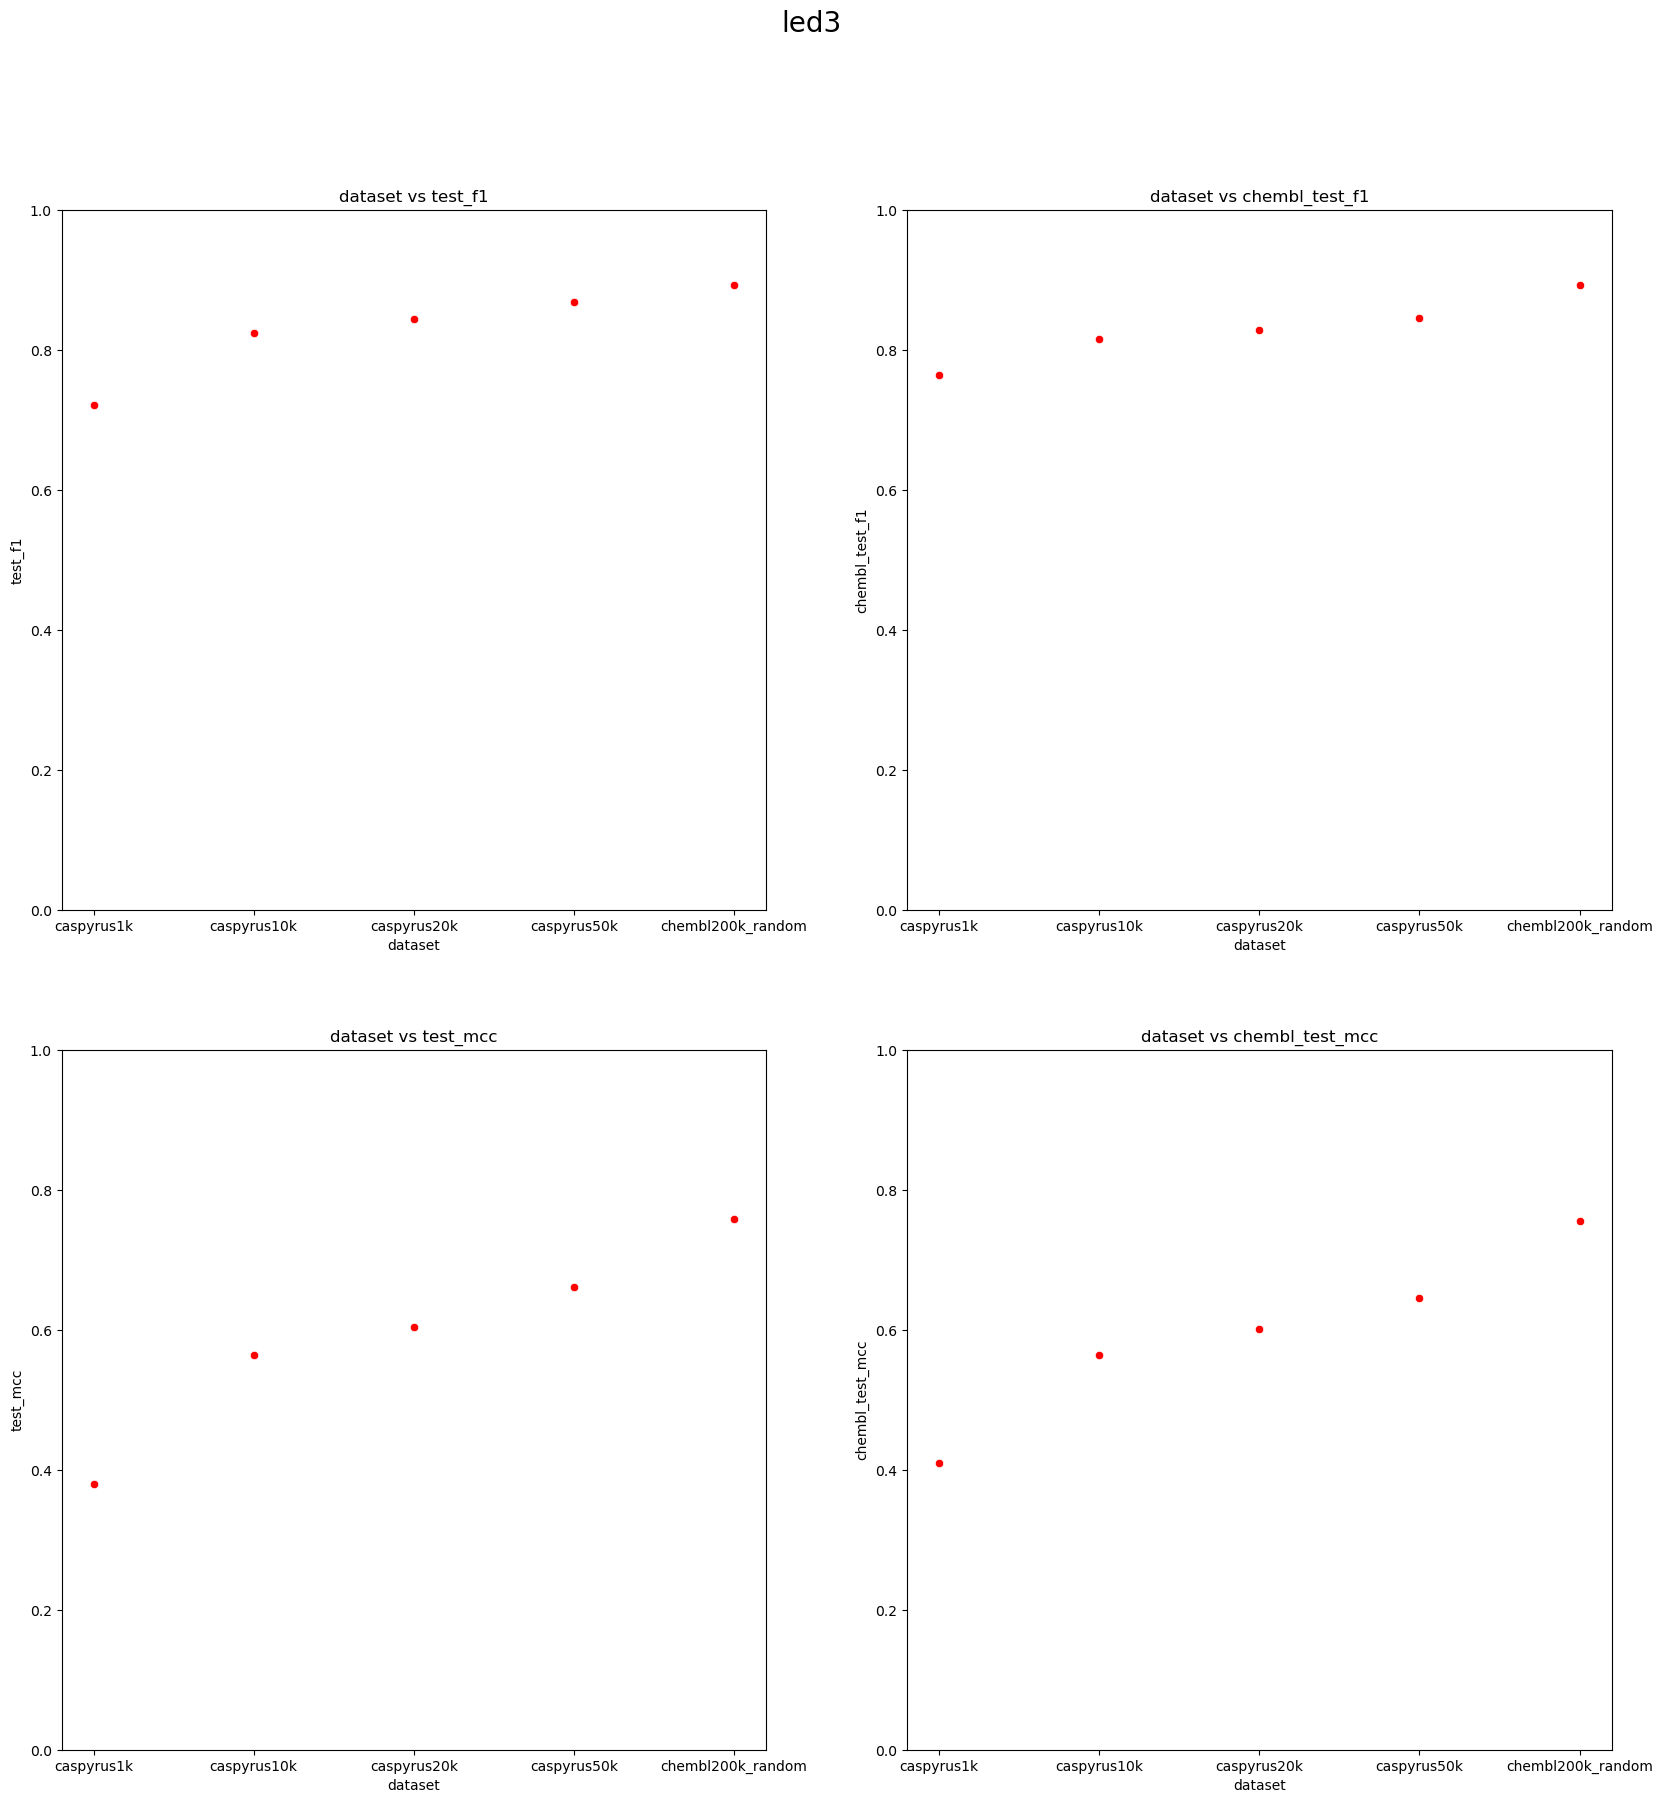

In [13]:
# change the labels to be more readable
led3_results["name"] = led3_results["name"].str.replace("led3_", "")
led3_results["name"] = led3_results["name"].str.replace("_hist_xgboost", "")

# create a 4x4 grid of plots with 

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# visualize name vs test_f1
sns.scatterplot(x="name", y="test_f1", data=led3_results, ax=axes[0, 0], color="red")
axes[0, 0].set_title("dataset vs test_f1")

# visualize name vs chembl_test_f1
sns.scatterplot(x="name", y="chembl_test_f1", data=led3_results, ax=axes[0, 1], color="red")
axes[0, 1].set_title("dataset vs chembl_test_f1")

# visualize name vs test_mcc
sns.scatterplot(x="name", y="test_mcc", data=led3_results, ax=axes[1, 0], color="red")
axes[1, 0].set_title("dataset vs test_mcc")

# visualize name vs chembl_test_mcc
sns.scatterplot(x="name", y="chembl_test_mcc", data=led3_results, ax=axes[1, 1], color="red")
axes[1, 1].set_title("dataset vs chembl_test_mcc")

# fix the axis values between 0.5 and 1
axes[0, 0].set_ylim(0, 1)
axes[0, 1].set_ylim(0, 1)
axes[1, 0].set_ylim(0, 1)
axes[1, 1].set_ylim(0, 1)


# set the x axes name to dataset
axes[0, 0].set_xlabel("dataset")
axes[0, 1].set_xlabel("dataset")
axes[1, 0].set_xlabel("dataset")
axes[1, 1].set_xlabel("dataset")

# set title to led3_score
fig.suptitle("led3", fontsize=20)

Text(0.5, 0.98, 'zinc')

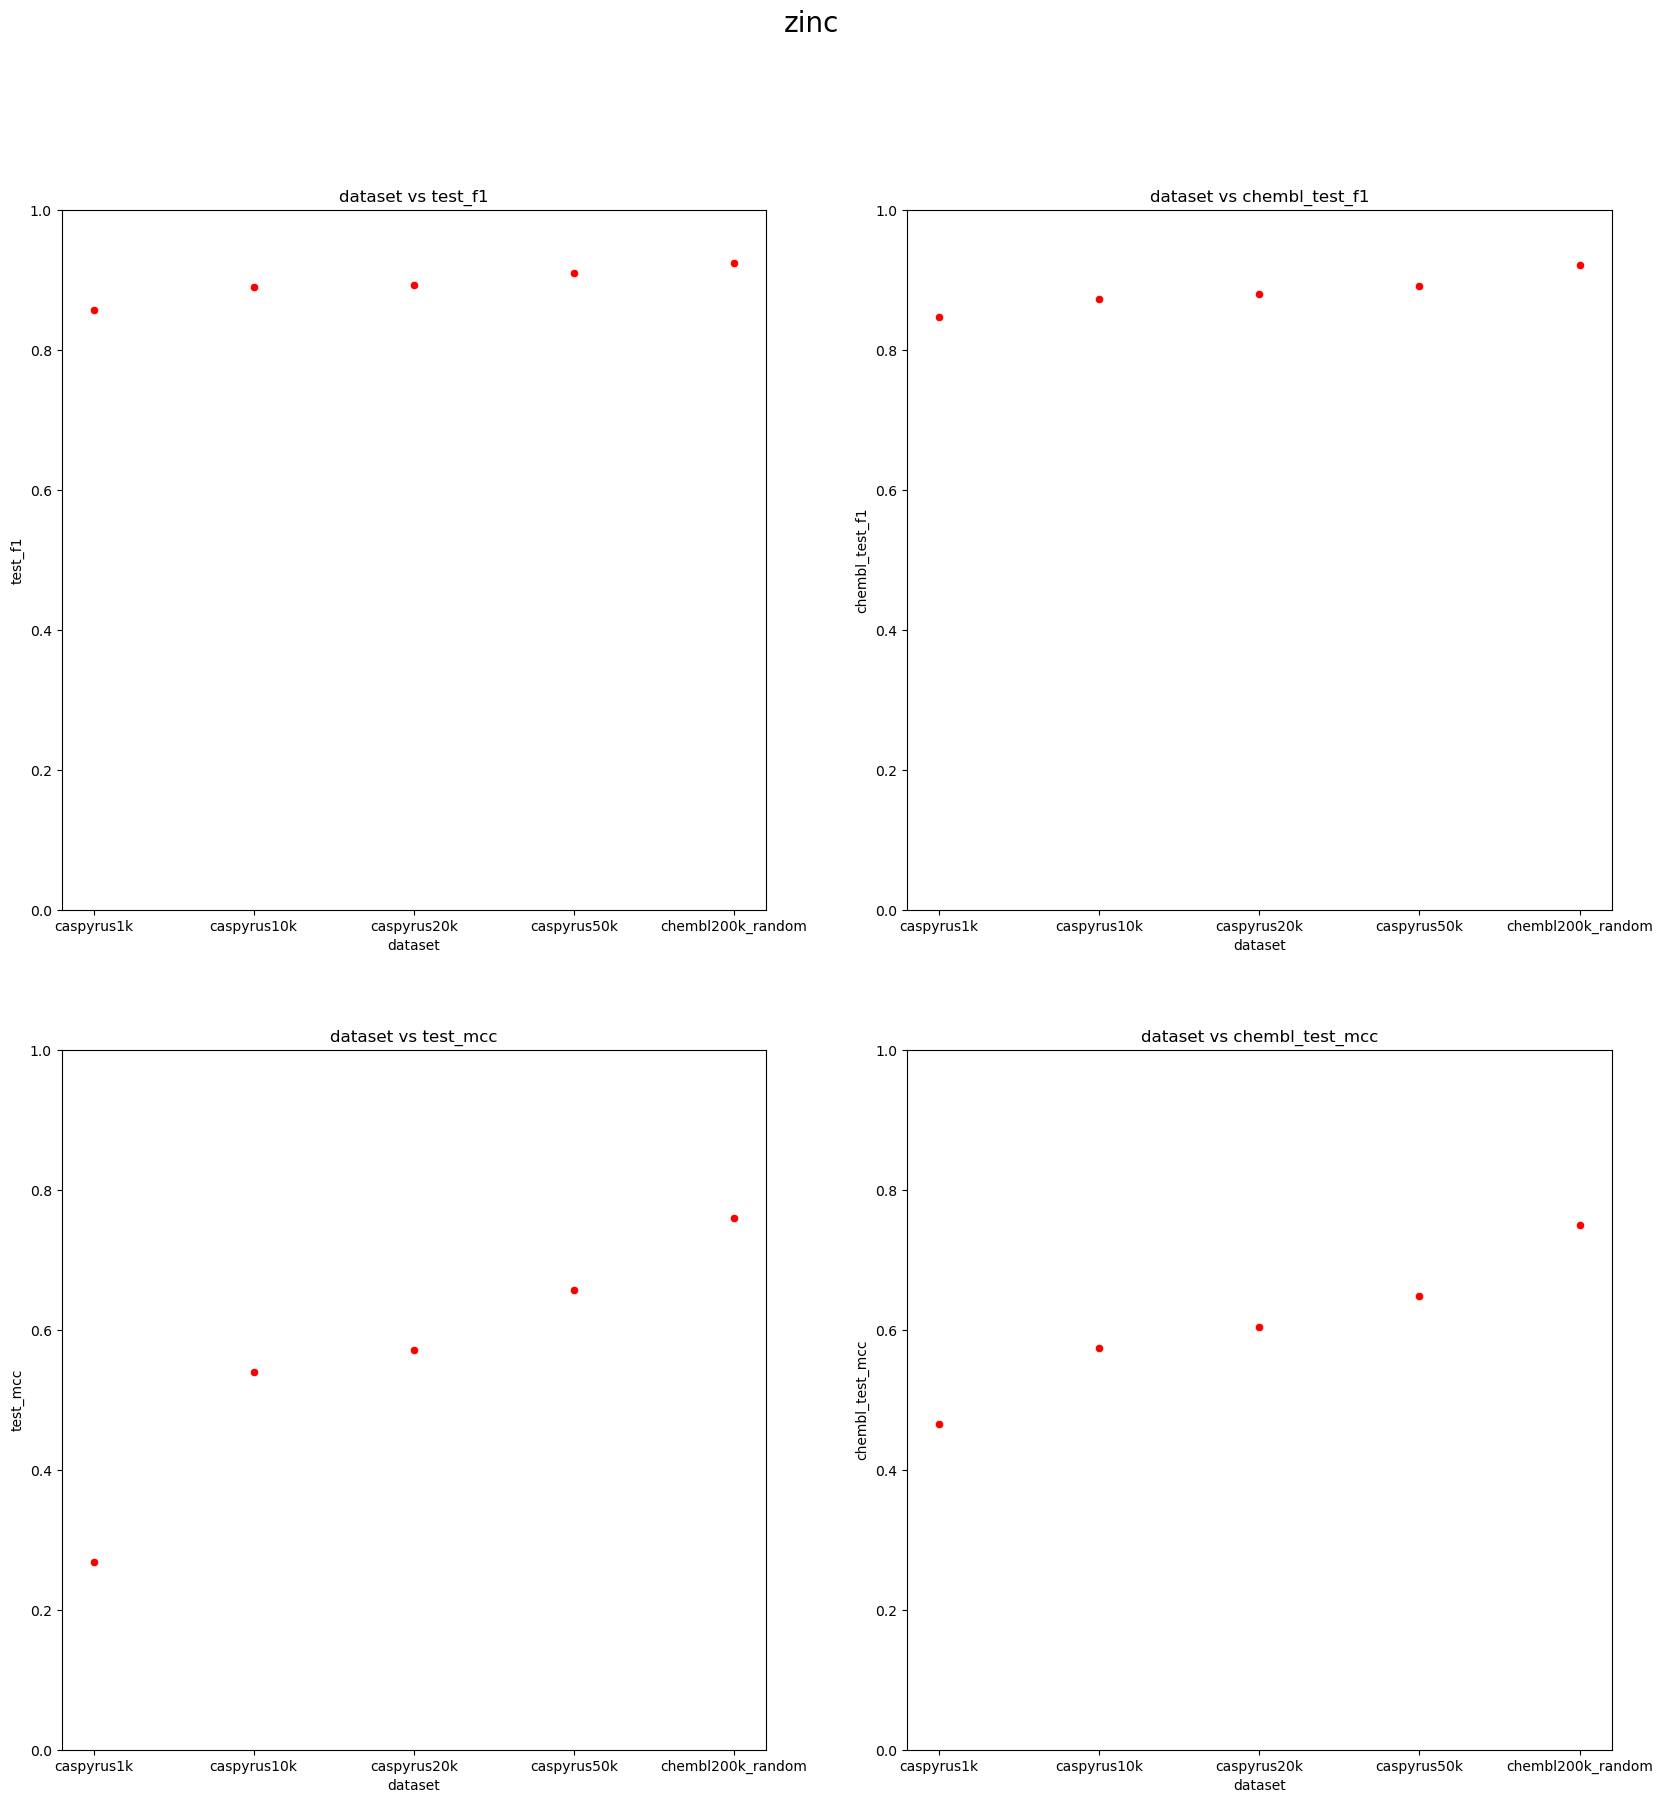

In [14]:
import pandas

zinc_results = ["<PATH>/led3_score/data/results/2_synthesis_score/models/zinc_caspyrus1k_hist_xgboost.csv",
"<PATH>/led3_score/data/results/2_synthesis_score/models/zinc_caspyrus10k_hist_xgboost.csv", 
"<PATH>/led3_score/data/results/2_synthesis_score/models/zinc_caspyrus20k_hist_xgboost.csv",
"<PATH>/led3_score/data/results/2_synthesis_score/models/zinc_caspyrus50k_hist_xgboost.csv",
"<PATH>/led3_score/data/results/2_synthesis_score/models/zinc_chembl200k_random_hist_xgboost.csv"
]

# load all results into a single dataframe
zinc_results = pandas.concat([pandas.read_csv(f) for f in zinc_results], ignore_index=True)

# change the labels to be more readable
zinc_results["name"] = zinc_results["name"].str.replace("zinc_", "")
zinc_results["name"] = zinc_results["name"].str.replace("_hist_xgboost", "")

# create a 4x4 grid of plots with 

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# visualize name vs test_f1
sns.scatterplot(x="name", y="test_f1", data=zinc_results, ax=axes[0, 0], color="red")
axes[0, 0].set_title("dataset vs test_f1")

# visualize name vs chembl_test_f1
sns.scatterplot(x="name", y="chembl_test_f1", data=zinc_results, ax=axes[0, 1], color="red")
axes[0, 1].set_title("dataset vs chembl_test_f1")

# visualize name vs test_mcc
sns.scatterplot(x="name", y="test_mcc", data=zinc_results, ax=axes[1, 0], color="red")
axes[1, 0].set_title("dataset vs test_mcc")

# visualize name vs chembl_test_mcc
sns.scatterplot(x="name", y="chembl_test_mcc", data=zinc_results, ax=axes[1, 1], color="red")
axes[1, 1].set_title("dataset vs chembl_test_mcc")

# fix the axis values between 0.5 and 1
axes[0, 0].set_ylim(0, 1)
axes[0, 1].set_ylim(0, 1)
axes[1, 0].set_ylim(0, 1)
axes[1, 1].set_ylim(0, 1)


# set the x axes name to dataset
axes[0, 0].set_xlabel("dataset")
axes[0, 1].set_xlabel("dataset")
axes[1, 0].set_xlabel("dataset")
axes[1, 1].set_xlabel("dataset")

# set title to zinc
fig.suptitle("zinc", fontsize=20)

In [6]:
zinc_results[["name", "train_f1", "test_f1", "chembl_test_f1"]]

,name,train_f1,test_f1,chembl_test_f1
0,caspyrus1k,1.000000,0.857143,0.846075
1,caspyrus10k,1.000000,0.888889,0.872117
2,caspyrus20k,0.999961,0.891901,0.879578
3,caspyrus50k,1.000000,0.909849,0.890423
4,chembl200k_random,0.999658,0.923888,0.920416


In [7]:
zinc_results[["name", "train_mcc", "test_mcc", "chembl_test_mcc"]]

,name,train_mcc,test_mcc,chembl_test_mcc
0,caspyrus1k,1.000000,0.267652,0.464521
1,caspyrus10k,1.000000,0.539825,0.573439
2,caspyrus20k,0.999862,0.570639,0.604394
3,caspyrus50k,1.000000,0.657195,0.647770
4,chembl200k_random,0.998976,0.759499,0.749848
